### Index
<b><ol>1 Introduction<br>
    2 Import Data and Python Packages<br>
    3 Data Understanding<br>
    4 Data Preprocessing<br>
    5 Data Modeling and Evaluation<br>
    6 Report
    </ol></b>

### 1 Introduction

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges to predict the final price of each home.

Two similar datasets that include information on residential homes are provided in this competition. One dataset is titled train.csv and the other is titled test.csv.

The train.csv contains the details of residential homes in Ames, Iowa and importantly, reveals the actual price of each house.

The test.csv dataset contains similar information but does not disclose the sales price for each house. Using the patterns found in the train.csv data, the goal is to predict the sales price (the value of the SalePrice variable) for each Id in the test set. 

##### Acknowledgments
The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

##### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

##### Submission File Format
The file should contain a header and have the following format:<br>
`Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.`

### 2 Import Data and Python Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

### 3 Data Understanding

In [3]:
train.shape

(1460, 81)

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print('Quantitative features: ' + str(quantitative))
print('Qualitative features: ' + str(qualitative))

Quantitative features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Qualitative features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTy

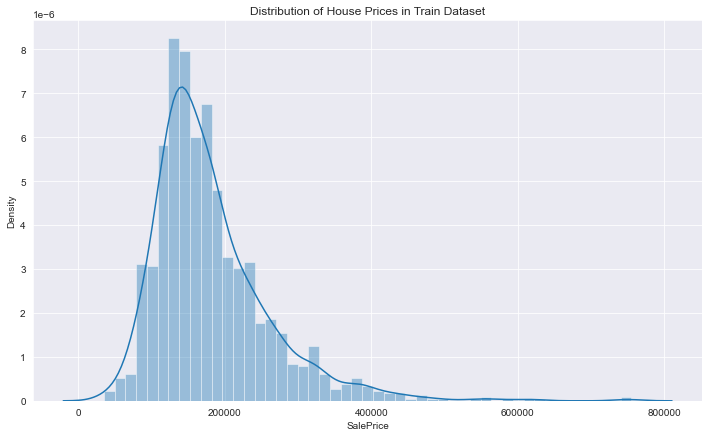

In [6]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(12, 7))
sns.distplot(train.SalePrice)
plt.title('Distribution of House Prices in Train Dataset')
plt.savefig('exploration1.png')

Notice that there are four examples whose GrLivArea values are greater than 4000.


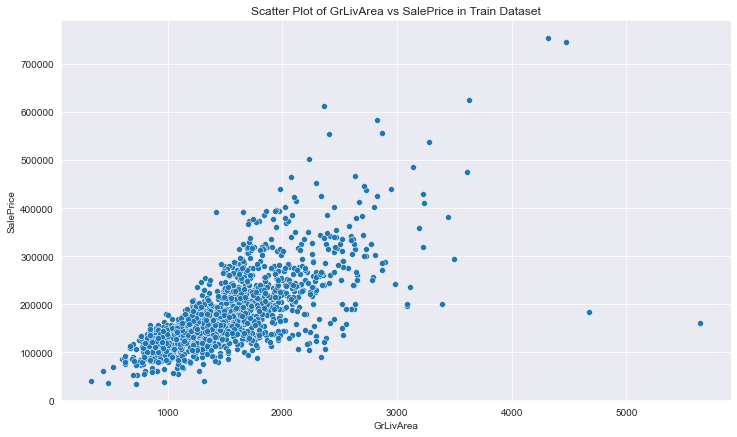

In [7]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='GrLivArea', y="SalePrice", data=train)
plt.title('Scatter Plot of GrLivArea vs SalePrice in Train Dataset')
print("Notice that there are four examples whose GrLivArea values are greater than 4000.")
plt.savefig('exploration2.png')

### 4 Data Preprocessing
Inspired by and partly sourced from https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

In [8]:
# save the actual price values in the train set and id's in the test set for future prediction visualization
truth = train.SalePrice
test_id = test.Id

In [9]:
datasets = [train, test]

# drop the unnecessary feature ID in both datasets
for df in datasets:
    df.drop("Id", axis = 1, inplace=True)

##### Removal of Outliers

In [10]:
# removal of houses with more than 4000 square feet as recommended by the author at https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
print("Rows to be removed: ")
train.loc[train['GrLivArea'] > 4000, ['GrLivArea', 'SalePrice']]

Rows to be removed: 


,GrLivArea,SalePrice
523,4676,184750
691,4316,755000
1182,4476,745000
1298,5642,160000


In [11]:
# remove specified outliers and reset index of the train set
train = train[train.GrLivArea < 4000]
train.reset_index(drop=True, inplace=True)

##### Log Transformation of Target

In [12]:
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

##### Missing Value Replacement

In [13]:
def missing_values_table(df):
        missing = df.isnull().sum()
        missing_percent = 100 * df.isnull().sum() / len(df)
        table = pd.concat([missing, missing_percent], axis=1).rename(columns = {0 : 'Missing Values', 1 : 'Missing Value Percentage'})
        table['Data Type'] = df.dtypes
        table = table[table.iloc[:,0] != 0].sort_values('Missing Value Percentage', ascending=False).round(2)
        print ("Of " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows, there are " + str(table.shape[0]) + " columns that have missing values.")
        return table

missing_values_table(train)

Of 80 columns and 1456 Rows, there are 19 columns that have missing values.


,Missing Values,Missing Value Percentage,Data Type
PoolQC,1451,99.66,object
MiscFeature,1402,96.29,object
Alley,1365,93.75,object
Fence,1176,80.77,object
FireplaceQu,690,47.39,object
LotFrontage,259,17.79,float64
GarageType,81,5.56,object
GarageYrBlt,81,5.56,float64
GarageFinish,81,5.56,object
GarageQual,81,5.56,object


In [14]:
# Handle missing values for features where median/mean or most common value doesn't make sense
# for df in datasets:
def replace_missing_values(df):
    
    # Alley : data description says NA means "no alley access"
    df.loc[:, "Alley"].fillna("None", inplace=True)
    # BedroomAbvGr : NA most likely means 0
    df.loc[:, "BedroomAbvGr"].fillna(0, inplace=True)
    # BsmtQual etc : data description says NA for basement features is "no basement"
    df.loc[:, "BsmtQual"].fillna("No", inplace=True)
    df.loc[:, "BsmtCond"].fillna("No", inplace=True)
    df.loc[:, "BsmtExposure"].fillna("No", inplace=True)
    df.loc[:, "BsmtFinType1"].fillna("No", inplace=True)
    df.loc[:, "BsmtFinType2"].fillna("No", inplace=True)
    df.loc[:, "BsmtFullBath"].fillna(0, inplace=True)
    df.loc[:, "BsmtHalfBath"].fillna(0, inplace=True)
    df.loc[:, "BsmtUnfSF"].fillna(0, inplace=True)
    # CentralAir : NA most likely means No
    df.loc[:, "CentralAir"].fillna("N", inplace=True)
    # Condition : NA most likely means Normal
    df.loc[:, "Condition1"].fillna("Norm", inplace=True)
    df.loc[:, "Condition2"].fillna("Norm", inplace=True)
    # EnclosedPorch : NA most likely means no enclosed porch
    df.loc[:, "EnclosedPorch"].fillna(0, inplace=True)
    # External stuff : NA most likely means average
    df.loc[:, "ExterCond"].fillna("TA", inplace=True)
    df.loc[:, "ExterQual"].fillna("TA", inplace=True)
    # Fence : data description says NA means "no fence"
    df.loc[:, "Fence"].fillna("No", inplace=True)
    # FireplaceQu : data description says NA means "no fireplace"
    df.loc[:, "FireplaceQu"].fillna("No", inplace=True)
    df.loc[:, "Fireplaces"].fillna(0, inplace=True)
    # Functional : data description says NA means typical
    df.loc[:, "Functional"].fillna("Typ", inplace=True)
    # GarageType etc : data description says NA for garage features is "no garage"
    df.loc[:, "GarageType"].fillna("No", inplace=True)
    df.loc[:, "GarageFinish"].fillna("No", inplace=True)
    df.loc[:, "GarageQual"].fillna("No", inplace=True)
    df.loc[:, "GarageCond"].fillna("No", inplace=True)
    df.loc[:, "GarageArea"].fillna(0, inplace=True)
    df.loc[:, "GarageCars"].fillna(0, inplace=True)
    # HalfBath : NA most likely means no half baths above grade
    df.loc[:, "HalfBath"].fillna(0, inplace=True)
    # HeatingQC : NA most likely means typical
    df.loc[:, "HeatingQC"].fillna("TA", inplace=True)
    # KitchenAbvGr : NA most likely means 0
    df.loc[:, "KitchenAbvGr"].fillna(0, inplace=True)
    # KitchenQual : NA most likely means typical
    df.loc[:, "KitchenQual"].fillna("TA", inplace=True)
    # LotFrontage : NA most likely means no lot frontage
    df.loc[:, "LotFrontage"].fillna(0, inplace=True)
    # LotShape : NA most likely means regular
    df.loc[:, "LotShape"].fillna("Reg", inplace=True)
    # MasVnrType : NA most likely means no veneer
    df.loc[:, "MasVnrType"].fillna("None", inplace=True)
    df.loc[:, "MasVnrArea"].fillna(0, inplace=True)
    # MiscFeature : data description says NA means "no misc feature"
    df.loc[:, "MiscFeature"].fillna("No", inplace=True)
    df.loc[:, "MiscVal"].fillna(0, inplace=True)
    # OpenPorchSF : NA most likely means no open porch
    df.loc[:, "OpenPorchSF"].fillna(0, inplace=True)
    # PavedDrive : NA most likely means not paved
    df.loc[:, "PavedDrive"].fillna("N", inplace=True)
    # PoolQC : data description says NA means "no pool"
    df.loc[:, "PoolQC"].fillna("No", inplace=True)
    df.loc[:, "PoolArea"].fillna(0, inplace=True)
    # SaleCondition : NA most likely means normal sale
    df.loc[:, "SaleCondition"].fillna("Normal", inplace=True)
    # ScreenPorch : NA most likely means no screen porch
    df.loc[:, "ScreenPorch"].fillna(0, inplace=True)
    # TotRmsAbvGrd : NA most likely means 0
    df.loc[:, "TotRmsAbvGrd"].fillna(0, inplace=True)
    # Utilities : NA most likely means all public utilities
    df.loc[:, "Utilities"].fillna("AllPub", inplace=True)
    # WoodDeckSF : NA most likely means no wood deck
    df.loc[:, "WoodDeckSF"].fillna(0, inplace=True)
    # MSZoning : NA most likely means unassigned zoning classifications
    df.loc[:, "MSZoning"].fillna("None", inplace=True)
    # Exterior1st : NA most likely means other
    df.loc[:, "Exterior1st"].fillna("Other", inplace=True)
    # Exterior2nd : NA most likely means other
    df.loc[:, "Exterior2nd"].fillna("Other", inplace=True)
    # Electrical : NA most likely means mixed
    df.loc[:, "Electrical"].fillna("Mix", inplace=True)
    # SaleType : NA most likely means other
    df.loc[:, "SaleType"].fillna("Oth", inplace=True)
    return None

replace_missing_values(train)
replace_missing_values(test)

##### Data Mapping

In [15]:
def replace_cat(df):

    # Some numerical features are actually really categories (to be dummied)
    df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                            7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}}, inplace=True)
    
    # Encode some categorical features as ordered numbers when there is information in the order 
    df.replace({"Alley" : {"None": 0, "Grvl" : 1, "Pave" : 2},
                "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
                "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                "Street" : {"Grvl" : 1, "Pave" : 2},
                "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}, inplace=True)
    return None

replace_cat(train)
replace_cat(test)

##### Addition of Polynomials of Top 10 Features Relative to Target

In [16]:
# top 10 important features relative to target
print("Top 10 features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice[:11])

Top 10 features relative to target
SalePrice      1.000000
OverallQual    0.819240
GrLivArea      0.718844
ExterQual      0.680947
GarageCars     0.680408
KitchenQual    0.667174
GarageArea     0.655212
TotalBsmtSF    0.641553
BsmtQual       0.615225
1stFlrSF       0.613742
FullBath       0.590919
Name: SalePrice, dtype: float64


In [17]:
def take_polynomials(df):
    
    df["OverallQual-s2"] = df["OverallQual"] ** 2
    df["OverallQual-s3"] = df["OverallQual"] ** 3
    df["OverallQual-Sq"] = np.sqrt(df["OverallQual"])
    df["GrLivArea-2"] = df["GrLivArea"] ** 2
    df["GrLivArea-3"] = df["GrLivArea"] ** 3
    df["GrLivArea-Sq"] = np.sqrt(df["GrLivArea"])
    df["ExterQual-2"] = df["ExterQual"] ** 2
    df["ExterQual-3"] = df["ExterQual"] ** 3
    df["ExterQual-Sq"] = np.sqrt(df["ExterQual"])
    df["GarageCars-2"] = df["GarageCars"] ** 2
    df["GarageCars-3"] = df["GarageCars"] ** 3
    df["GarageCars-Sq"] = np.sqrt(df["GarageCars"])
    df["KitchenQual-2"] = df["KitchenQual"] ** 2
    df["KitchenQual-3"] = df["KitchenQual"] ** 3
    df["KitchenQual-Sq"] = np.sqrt(df["KitchenQual"])
    df["GarageArea-2"] = df["GarageArea"] ** 2
    df["GarageArea-3"] = df["GarageArea"] ** 3
    df["GarageArea-Sq"] = np.sqrt(df["GarageArea"])
    df["BsmtQual-2"] = df["BsmtQual"] ** 2
    df["BsmtQual-3"] = df["BsmtQual"] ** 3
    df["BsmtQual-Sq"] = np.sqrt(df["BsmtQual"])
    df["TotalBsmtSF-2"] = df["TotalBsmtSF"] ** 2
    df["TotalBsmtSF-3"] = df["TotalBsmtSF"] ** 3
    df["TotalBsmtSF-Sq"] = np.sqrt(df["TotalBsmtSF"])
    df["1stFlrSF-2"] = df["1stFlrSF"] ** 2
    df["1stFlrSF-3"] = df["1stFlrSF"] ** 3
    df["1stFlrSF-Sq"] = np.sqrt(df["1stFlrSF"])
    df["FullBath-2"] = df["FullBath"] ** 2
    df["FullBath-3"] = df["FullBath"] ** 3
    df["FullBath-Sq"] = np.sqrt(df["FullBath"])    
    return None

take_polynomials(train)
take_polynomials(test)

##### Median Imputation for Numerical Features

In [18]:
# separate numerical features from categorical features and drop the target feature SalePrice
train_categorical_features = train.select_dtypes(include = ["object"]).columns
train_numerical_features = train.select_dtypes(exclude = ["object"]).columns
train_numerical_features = train_numerical_features.drop("SalePrice")
test_categorical_features = test.select_dtypes(include = ["object"]).columns
test_numerical_features = test.select_dtypes(exclude = ["object"]).columns

train_num = train[train_numerical_features]
train_cat = train[train_categorical_features]
test_num = test[test_numerical_features]
test_cat = test[test_categorical_features]

# replace remaining missing values for numerical features with median
train_num = train_num.fillna(train_num.median())
test_num = test_num.fillna(train_num.median())

In [19]:
if train_categorical_features.equals(test_categorical_features) == True:
    print("The categorical features in the train set and the test set are identical.")
    
if train_numerical_features.equals(test_numerical_features) == True:
    print("The numerical features in the train set and the test set are identical.")

The categorical features in the train set and the test set are identical.
The numerical features in the train set and the test set are identical.


##### Log Transformation of Numerical Features

In [20]:
# a skewness with an absolute value > 0.5 is considered at least moderately skewed
train_skewness = train_num.apply(lambda x: skew(x))
train_skewness = train_skewness[abs(train_skewness) > 0.5]
train_skewed_features = train_skewness.index
train_num[train_skewed_features] = np.log1p(train_num[train_skewed_features])
test_num[train_skewed_features] = np.log1p(test_num[train_skewed_features])

In [21]:
check =  all(item in test_num.columns for item in train_skewed_features)
 
if check is True:
    print("The list of columns in {} contains all elements of the list {}.".format("test_num", "train_skewed_features"))    
else :
    print("No, the list of columns in {} doesn't have all elements of the list {}.".format("test_num", "train_skewed_features"))

The list of columns in test_num contains all elements of the list train_skewed_features.


##### One-Hot Encoding of Categorical Features

In [22]:
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehot_encoder.fit(train_cat)
train_cat = pd.DataFrame(onehot_encoder.transform(train_cat), columns=onehot_encoder.get_feature_names())
test_cat = pd.DataFrame(onehot_encoder.transform(test_cat), columns=onehot_encoder.get_feature_names())

##### Join Categorical and Numerical Features and Get Datasets Ready for Modeling!

In [23]:
train = pd.concat([train_num, train_cat], axis = 1)
test = pd.concat([test_num, test_cat], axis = 1)

col = train.columns

print("Train Set:")
print("Number of skewed numerical features log transformed : " + str(train_skewness.shape[0]))
print("Number of NAs in features : " + str(train.isnull().values.sum()))
print("Number of numerical features : " + str(len(train_numerical_features)))
print("Number of categorical features : " + str(len(train_categorical_features)))
print("New number of features : " + str(train.shape[1]))
print("_" * 60 + "\n")
print("Test Set:")
print("Number of skewed numerical features log transformed : " + str(train_skewness.shape[0]))
print("Number of NAs in features : " + str(test.isnull().values.sum()))
print("Number of numerical features : " + str(len(test_numerical_features)))
print("Number of categorical features : " + str(len(test_categorical_features)))
print("New number of features : " + str(test.shape[1]))

Train Set:
Number of skewed numerical features log transformed : 67
Number of NAs in features : 0
Number of numerical features : 84
Number of categorical features : 25
New number of features : 283
____________________________________________________________

Test Set:
Number of skewed numerical features log transformed : 67
Number of NAs in features : 0
Number of numerical features : 84
Number of categorical features : 25
New number of features : 283


### 5 Data Modeling

##### Train Test Split

In [24]:
# train test split performed on the train set with shuffle=False after manual rearrange of rows 
# in order to put at least one row of every target(SalePrice) value in the train set

# first, add SalePrice(y) back to the train set and create a new column of its original index by resetting index
train['SalePrice'] = y
train.reset_index(inplace=True)
# then, create unique dataframe that contains one row of every SalePrice value, and set the index column from train dataframe as its index
unique = train.groupby('SalePrice', as_index=False).first()
unique.set_index('index', inplace=True)
# drop now-unnecessary index column and render its state back to as it was at the end of preprocessing (but still has the SalePrice column, will drop later)
train.drop(['index'], axis=1, inplace=True)
# empty the index name of the unique dataframe
unique.index.name = None
# now the unique dataframe is ready, only containing one row of every SalePrice value
unique

,SalePrice,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,...,x23_ConLw,x23_New,x23_Oth,x23_WD,x24_Abnorml,x24_AdjLand,x24_Alloca,x24_Family,x24_Normal,x24_Partial
495,10.460271,60.0,8.972083,1.098612,0.000000,1.609438,1.609438,1.386294,4,1.791759,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
914,10.471978,50.0,9.105091,1.098612,0.000000,1.609438,1.609438,1.386294,2,1.386294,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
966,10.542733,50.0,8.687105,1.098612,0.000000,1.609438,1.609438,1.386294,3,1.945910,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
532,10.579005,50.0,8.517393,1.098612,0.000000,1.609438,1.609438,1.098612,1,1.386294,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30,10.596660,50.0,9.047939,1.098612,1.098612,1.609438,1.609438,1.386294,4,1.609438,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,13.226725,105.0,9.644199,1.098612,0.000000,1.609438,1.609438,1.386294,10,1.791759,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1044,13.229570,85.0,9.683900,1.098612,0.000000,1.386294,1.609438,1.386294,9,1.791759,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
801,13.275829,107.0,9.539068,1.098612,0.000000,1.609438,1.609438,1.386294,9,1.791759,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
896,13.323929,100.0,9.466532,1.098612,0.000000,1.386294,1.609438,1.386294,9,1.791759,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
# create a new dataframe rest which contains the rest of the rows in the train set, not containing any row in the unique dataframe
rest = train[~train.index.isin(unique.index)]
rest

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,x23_New,x23_Oth,x23_WD,x24_Abnorml,x24_AdjLand,x24_Alloca,x24_Family,x24_Normal,x24_Partial,SalePrice
23,44.0,8.348775,1.098612,0.000000,1.609438,1.609438,1.386294,5,2.079442,7.589336,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.774528
42,0.0,9.124891,1.098612,0.000000,1.386294,1.609438,1.386294,5,2.079442,7.592870,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.877576
63,50.0,9.239996,1.098612,0.000000,1.386294,1.609438,1.386294,7,1.945910,7.561122,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.849405
71,69.0,8.935904,1.098612,0.000000,1.609438,1.609438,1.386294,4,1.945910,7.592366,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.771444
77,50.0,9.063695,1.098612,0.000000,1.609438,1.609438,1.386294,5,1.791759,7.575072,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.751950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,35.0,8.209580,1.098612,0.000000,1.609438,1.609438,1.386294,5,1.791759,7.603898,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.884496
1449,90.0,9.753711,1.098612,0.000000,1.609438,1.609438,1.386294,5,1.791759,7.604396,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11.344519
1450,62.0,8.922792,1.098612,1.098612,1.609438,1.609438,1.386294,7,1.791759,7.603399,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.128117
1451,62.0,8.976894,1.098612,0.000000,1.609438,1.609438,1.386294,6,1.791759,7.600902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.072547


In [26]:
# now that both unique and rest dataframes are created containing SalePrice in a new order, it is okay to delete SalePrice from the train set
train.drop('SalePrice', axis=1, inplace=True)

# create a new dataframe train with rows in a different order - one row of every SalePrice value at the top, the rest at the bottom
train_new = pd.concat([unique, rest])
y = train_new.SalePrice
train_new.drop('SalePrice', axis=1, inplace=True)
train_new # new train set dataframe with rows in a different order

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,x23_ConLw,x23_New,x23_Oth,x23_WD,x24_Abnorml,x24_AdjLand,x24_Alloca,x24_Family,x24_Normal,x24_Partial
495,60.0,8.972083,1.098612,0.000000,1.609438,1.609438,1.386294,4,1.791759,7.560601,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
914,50.0,9.105091,1.098612,0.000000,1.609438,1.609438,1.386294,2,1.386294,7.575585,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
966,50.0,8.687105,1.098612,0.000000,1.609438,1.609438,1.386294,3,1.945910,7.555382,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
532,50.0,8.517393,1.098612,0.000000,1.609438,1.609438,1.098612,1,1.386294,7.574045,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30,50.0,9.047939,1.098612,1.098612,1.609438,1.609438,1.386294,4,1.609438,7.560601,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,35.0,8.209580,1.098612,0.000000,1.609438,1.609438,1.386294,5,1.791759,7.603898,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1449,90.0,9.753711,1.098612,0.000000,1.609438,1.609438,1.386294,5,1.791759,7.604396,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1450,62.0,8.922792,1.098612,1.098612,1.609438,1.609438,1.386294,7,1.791759,7.603399,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1451,62.0,8.976894,1.098612,0.000000,1.609438,1.609438,1.386294,6,1.791759,7.600902,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# bring rows within the unique dataframe to the top and try train test split with shuffle=False
X_train, X_test, y_train, y_test = train_test_split(train_new, y, test_size = 0.2, random_state = 0, shuffle=False)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1164, 283)
X_test : (292, 283)
y_train : (1164,)
y_test : (292,)


##### Ridge Regression

In [28]:
ridge = RidgeCV(normalize = True, alphas = np.linspace(0.1,1,20)).fit(X_train, y_train)
print("Best alpha :", ridge.alpha_)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
print("Ridge RMSE on training set : ", mean_squared_error(y_train, y_pred_train, squared=False))
print("Ridge R-squared on training set : ", r2_score(y_train, y_pred_train))
print("Ridge RMSE on test set : ", mean_squared_error(y_test, y_pred_test, squared=False))
print("Ridge R-squared on test set : ", r2_score(y_test, y_pred_test))
ridge_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
ridge_r2 = r2_score(y_test, y_pred_test)

Best alpha : 0.2894736842105263
Ridge RMSE on training set :  0.09861511772595295
Ridge R-squared on training set :  0.9433225494436087
Ridge RMSE on test set :  0.1078374048599644
Ridge R-squared on test set :  0.8760133816113607


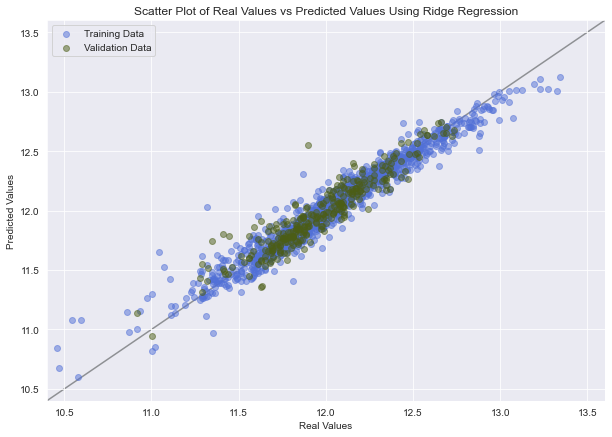

In [29]:
plt.figure(figsize=(10, 7))
plt.plot([10, 14], [10, 14], c='#343837', alpha=0.5, zorder=0)
plt.scatter(y_train, y_pred_train, c = "#5170d7", alpha=0.5, label = "Training Data", zorder=1)
plt.scatter(y_test, y_pred_test, c = "#4b5d16", alpha=0.5, label = "Validation Data", zorder=2)
plt.title("Scatter Plot of Real Values vs Predicted Values Using Ridge Regression")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.xlim(10.4, 13.6)
plt.ylim(10.4, 13.6)
plt.savefig('ridge.png')

##### Lasso Regression

In [30]:
lasso = LassoCV(normalize = True, alphas = np.linspace(0.00005,0.0001,20)).fit(X_train, y_train)
print("Best alpha :", lasso.alpha_)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
print("Lasso RMSE on training set : ", mean_squared_error(y_train, y_pred_train, squared=False))
print("Lasso R-squared on training set : ", r2_score(y_train, y_pred_train))
print("Lasso RMSE on test set : ", mean_squared_error(y_test, y_pred_test, squared=False))
print("Lasso R-squared on test set : ", r2_score(y_test, y_pred_test))
lasso_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
lasso_r2 = r2_score(y_test, y_pred_test)

Best alpha : 6.31578947368421e-05
Lasso RMSE on training set :  0.09707439701496941
Lasso R-squared on training set :  0.9450797235244529
Lasso RMSE on test set :  0.10476104575992143
Lasso R-squared on test set :  0.8829865970559939


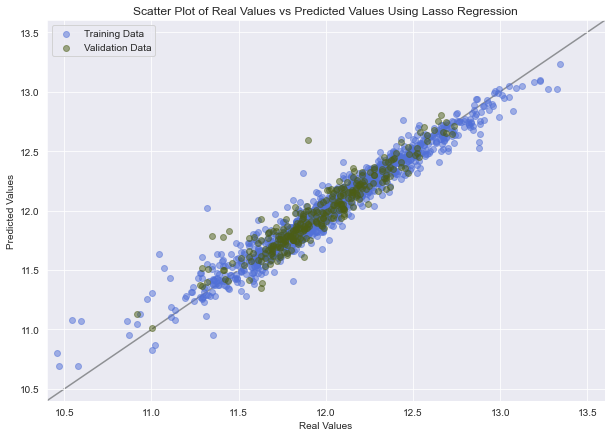

In [31]:
plt.figure(figsize=(10, 7))
plt.plot([10, 14], [10, 14], c='#343837', alpha=0.5, zorder=0)
plt.scatter(y_train, y_pred_train, c = "#5170d7", alpha=0.5, label = "Training Data", zorder=1)
plt.scatter(y_test, y_pred_test, c = "#4b5d16", alpha=0.5, label = "Validation Data", zorder=2)
plt.title("Scatter Plot of Real Values vs Predicted Values Using Lasso Regression")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.xlim(10.4, 13.6)
plt.ylim(10.4, 13.6)
plt.savefig('lasso.png')

##### Elastic Net Regression

In [32]:
elasticNet = ElasticNetCV(normalize = True, l1_ratio = [.1, .5, .7, .75, .8, .825, .85, .875, .9, .925, .95, .975, .99, 1]).fit(X_train, y_train)
print("Best alpha :", elasticNet.alpha_)
print("Best l1_ratio :", elasticNet.l1_ratio_)

y_pred_train = elasticNet.predict(X_train)
y_pred_test = elasticNet.predict(X_test)
print("Elastic Net RMSE on training set : ", mean_squared_error(y_train, y_pred_train, squared=False))
print("Elastic Net R-squared on training set : ", r2_score(y_train, y_pred_train))
print("Elastic Net RMSE on test set : ", mean_squared_error(y_test, y_pred_test, squared=False))
print("Elastic Net R-squared on test set : ", r2_score(y_test, y_pred_test))
elasticNet_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
elasticNet_r2 = r2_score(y_test, y_pred_test)

Best alpha : 7.084924852696393e-05
Best l1_ratio : 0.875
Elastic Net RMSE on training set :  0.09717989617611725
Elastic Net R-squared on training set :  0.9449602854085158
Elastic Net RMSE on test set :  0.10462426253528934
Elastic Net R-squared on test set :  0.883291959064217


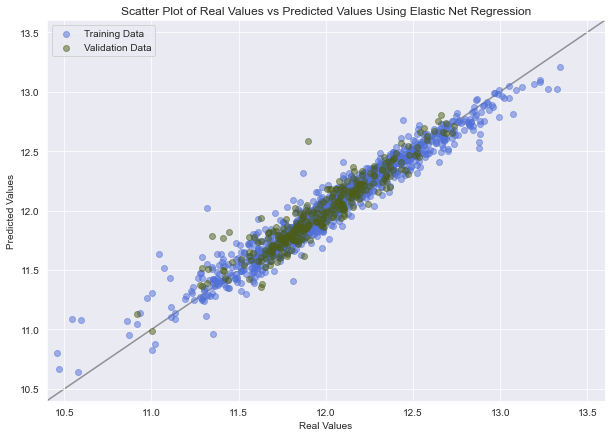

In [33]:
plt.figure(figsize=(10, 7))
plt.plot([10, 14], [10, 14], c='#343837', alpha=0.5, zorder=0)
plt.scatter(y_train, y_pred_train, c = "#5170d7", alpha=0.5, label = "Training Data", zorder=1)
plt.scatter(y_test, y_pred_test, c = "#4b5d16", alpha=0.5, label = "Validation Data", zorder=2)
plt.title("Scatter Plot of Real Values vs Predicted Values Using Elastic Net Regression")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.xlim(10.4, 13.6)
plt.ylim(10.4, 13.6)
plt.savefig('elasticnet.png')

##### Random Forest Regression

In [34]:
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Random Forest RMSE on training set : ", mean_squared_error(y_train, y_pred_train, squared=False))
print("Random Forest R-squared on training set : ", r2_score(y_train, y_pred_train))
print("Random Forest RMSE on test set : ", mean_squared_error(y_test, y_pred_test, squared=False))
print("Random Forest R-squared on test set : ", r2_score(y_test, y_pred_test))
rf_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rf_r2 = r2_score(y_test, y_pred_test)

Random Forest RMSE on training set :  0.051278058048864185
Random Forest R-squared on training set :  0.9846754951464154
Random Forest RMSE on test set :  0.13171178092834698
Random Forest R-squared on test set :  0.815036854026564


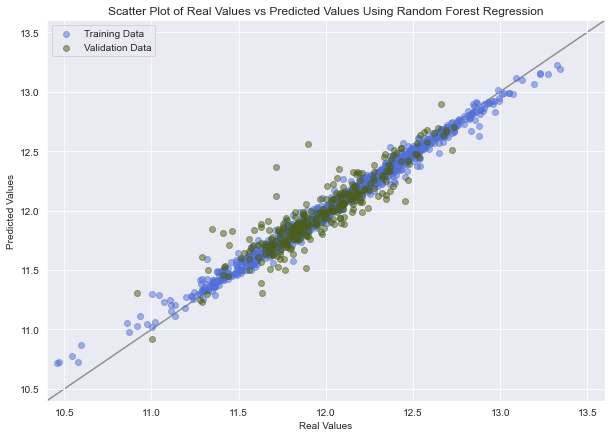

In [35]:
plt.figure(figsize=(10, 7))
plt.plot([10, 14], [10, 14], c='#343837', alpha=0.5, zorder=0)
plt.scatter(y_train, y_pred_train, c = "#5170d7", alpha=0.5, label = "Training Data", zorder=1)
plt.scatter(y_test, y_pred_test, c = "#4b5d16", alpha=0.5, label = "Validation Data", zorder=2)
plt.title("Scatter Plot of Real Values vs Predicted Values Using Random Forest Regression")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.xlim(10.4, 13.6)
plt.ylim(10.4, 13.6)
plt.savefig('randomforest.png')

##### Gradient Boosting Regression

In [36]:
gb = GradientBoostingRegressor().fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
print("Gradient Boosting RMSE on training set : ", mean_squared_error(y_train, y_pred_train, squared=False))
print("Gradient Boosting R-squared on training set : ", r2_score(y_train, y_pred_train))
print("Gradient Boosting RMSE on test set : ", mean_squared_error(y_test, y_pred_test, squared=False))
print("Gradient Boosting R-squared on test set : ", r2_score(y_test, y_pred_test))
gb_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
gb_r2 = r2_score(y_test, y_pred_test)

Gradient Boosting RMSE on training set :  0.07360134486126776
Gradient Boosting R-squared on training set :  0.9684285294154077
Gradient Boosting RMSE on test set :  0.11815725990431367
Gradient Boosting R-squared on test set :  0.8511472777619353


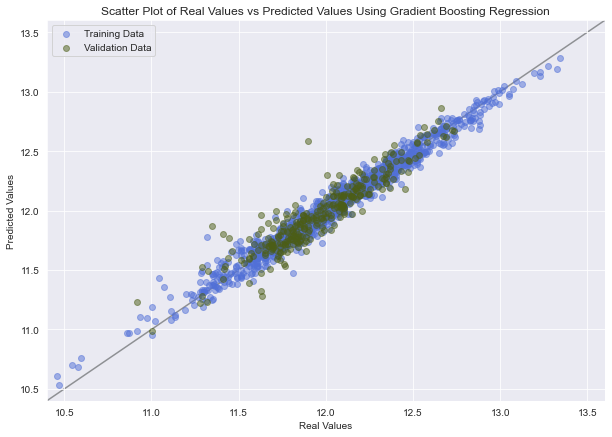

In [37]:
plt.figure(figsize=(10, 7))
plt.plot([10, 14], [10, 14], c='#343837', alpha=0.5, zorder=0)
plt.scatter(y_train, y_pred_train, c = "#5170d7", alpha=0.5, label = "Training Data", zorder=1)
plt.scatter(y_test, y_pred_test, c = "#4b5d16", alpha=0.5, label = "Validation Data", zorder=2)
plt.title("Scatter Plot of Real Values vs Predicted Values Using Gradient Boosting Regression")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.xlim(10.4, 13.6)
plt.ylim(10.4, 13.6)
plt.savefig('gradientboosting.png')

##### Evaluation Summary

In [38]:
models = pd.DataFrame({
    'Regression Model': ['Ridge', 'Lasso', 'Elastic Net', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [ridge_rmse, lasso_rmse, elasticNet_rmse, rf_rmse, gb_rmse],
    'R-Squared': ['{:.2%}'.format(r2) for r2 in [ridge_r2, lasso_r2, elasticNet_r2, rf_r2, gb_r2]]})
models = models.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
print("The most ideal model is {} Regression with test set RMSE of {}.".format(models.iloc[0, 0], models.iloc[0,1]))
models

The most ideal model is Elastic Net Regression with test set RMSE of 0.10462426253528934.


,Regression Model,RMSE,R-Squared
0,Elastic Net,0.104624,88.33%
1,Lasso,0.104761,88.30%
2,Ridge,0.107837,87.60%
3,Gradient Boosting,0.118157,85.11%
4,Random Forest,0.131712,81.50%


### 6 Report

In [39]:
# call the best model on the test set and save the predictions to prediction
prediction = elasticNet.predict(test)
# back-transform predictions and round up to the hundredth as prediction values should be in dollars
prediction = np.round(np.expm1(prediction), 2)

In [40]:
submission = pd.DataFrame({
        "Id": test_id,
        "SalePrice": prediction
    })
submission.to_csv('submission.csv', index=False)
submission.head(10)

,Id,SalePrice
0,1461,122366.57
1,1462,158451.22
2,1463,182514.82
3,1464,193716.01
4,1465,203708.49
5,1466,169786.22
6,1467,175171.22
7,1468,162177.72
8,1469,198239.65
9,1470,115143.74


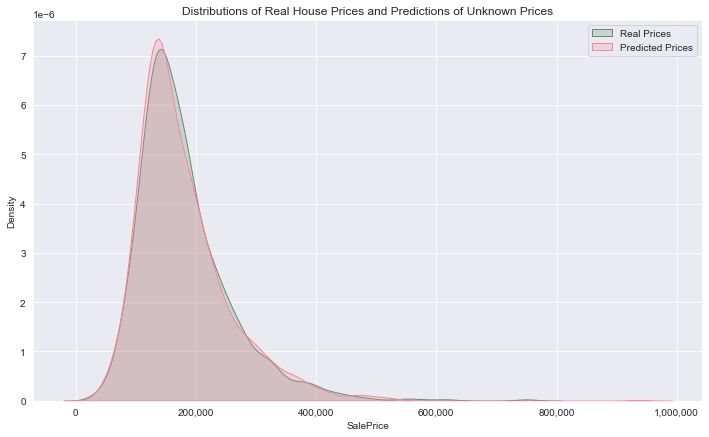

In [41]:
plt.figure(figsize=(12, 7))
sns.kdeplot(truth, color="#658d6d", shade=True) 
sns.kdeplot(submission.SalePrice, color="#f7879a", shade=True)
plt.legend(['Real Prices', 'Predicted Prices'])
plt.ticklabel_format(axis='x', style='plain')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Distributions of Real House Prices and Predictions of Unknown Prices')
plt.savefig('prediction.png')